# Matplotlib - 3D Volumetric MRI dataset

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import tempfile
import os
import zipfile

from urllib.request import urlretrieve

## Create a temporary directory - Retrieve the Data

In [3]:
d = tempfile.mkdtemp()

### Return tail of the path

In [4]:
os.path.basename('http://google.com/attention.zip')

'attention.zip'

In [5]:
url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/attention/attention.zip'

fn, info = urlretrieve(url, os.path.join(d, 'attention.zip'))

### Extract the data from the zip file - to the temporary file

In [6]:
zipfile.ZipFile(fn).extractall(path=d)

### View some file contents

In [7]:
[f.filename for f in zipfile.ZipFile(fn).filelist[:10]]

['attention/',
 'attention/multi_block_regressors.mat',
 'attention/README_DATA.txt',
 'attention/factors.mat',
 'attention/functional/',
 'attention/functional/snffM00587_0201.hdr',
 'attention/functional/snffM00587_0040.img',
 'attention/functional/snffM00587_0458.hdr',
 'attention/functional/snffM00587_0185.img',
 'attention/functional/snffM00587_0018.hdr']

### These are NIfTI files
* the nibabel library includes a Reader, capable of handling these files

In [9]:
!pip install nibabel

    100% |████████████████████████████████| 3.3MB 1.8MB/s ta 0:00:011
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
import nibabel

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Read the Image - Get the numpy array using .get_data( )

In [11]:
struct = nibabel.load(os.path.join(d, 'attention/structural/nsM00587_0002.hdr'))

struct_arr = struct.get_data()

### Look at a slice of the array

<IPython.core.display.Javascript object>


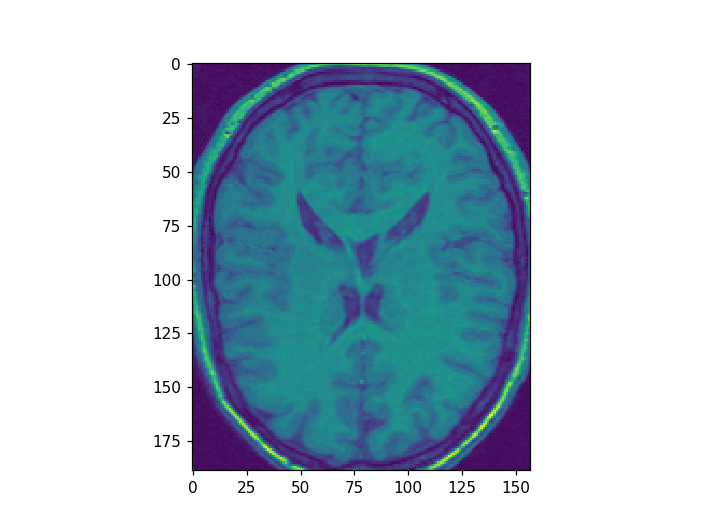

In [14]:
plt.imshow(struct_arr[75]);

### Adjust the resolution - using aspect parameter

In [17]:
plt.imshow(struct_arr[75], aspect=0.5);

### The image above is change when the code is executed
* this is because of the %matplotlib notebook code - Interactive
* to see static images - use %matplotlib inline
* for the functions a few steps below - will need to switch back to the interactive version

### Transpose the data - to see Horizontal slices

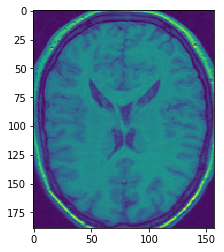

In [19]:
%matplotlib inline

struct_arr2 = struct_arr.T

plt.imshow(struct_arr2[34])

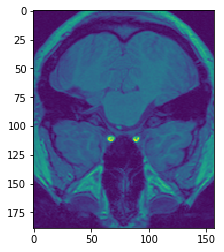

In [20]:
plt.imshow(struct_arr2[5])

## Calling all of the available images individually can be tedious
* it is possible to scroll through the 3D volume in the matplotlib viewer
* this is done using the matplotlib Event Handler API
    * allowing one to define actions in response to certain key presses

### Create shortcuts for 'j' and 'k' on the keyboard - bound to actions 'previous slice' and 'next slice'

In [21]:
def previous_slice():
    pass

def next_slice():
    pass

def process_key(event):
    if event.key == 'j':
        previous_slice()
    elif event.key() == 'k':
        next_slice()

### Implement these shortcuts
* instruct figure to use process_key function
* using mpl_connect( )

5

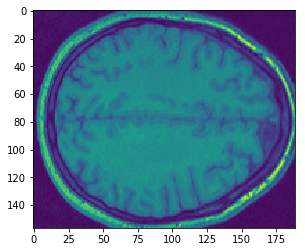

In [22]:
fig, ax = plt.subplots()

ax.imshow(struct_arr[..., 43])

fig.canvas.mpl_connect('key_press_event', process_key)

### Manipulate the Axes Object
* imshow - returns an AxesImage object 
* exists within matplotlib Axes object - located in the .images attribute * the image data displayed can be swapped - with set_array method
    * plot/store an arbitrary index - on the Axes object
    * provide next_slice and previous_slice functions to change index
        * using set_array - to set the corresponding slice
    * use draw - a figure canvas method - for redrawing the new data

In [23]:
def multi_slice_viewer(volume):
    fig, ax =  plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)
    
def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()
    
def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])
    
def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

<IPython.core.display.Javascript object>


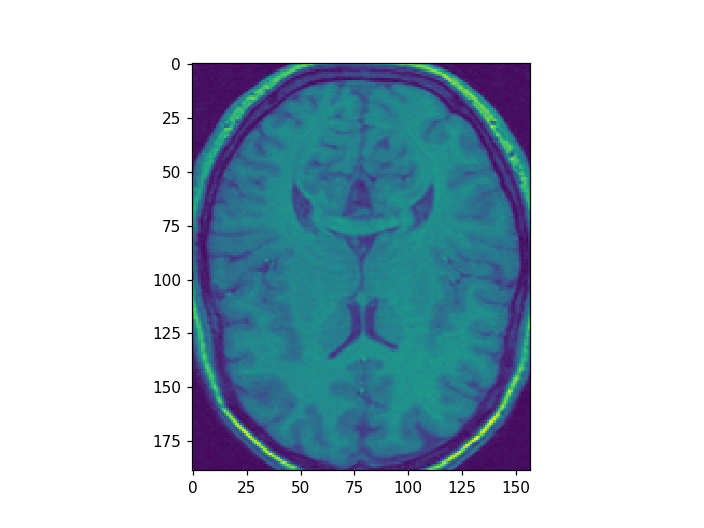

In [25]:
%matplotlib notebook
multi_slice_viewer(struct_arr2)

# Success!
### When the above cell is active (clicked, blue), pressing 'j' and 'k' scrolls down/up through the interactive imaging.
#### Delete the temporary directory, created at the start of this exercise, by executing the following code

In [26]:
# import shutil

# shutil.rmtree(d) 